**Leekhith Nunna**

**BL.EN.U4AIE23060**

A1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

*Train a KNN Classifier and Make Predictions*

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("/content/dataset.csv")

# Splitting features and target label
X = df.drop(columns=["label"])
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

*Compute Confusion Matrix*

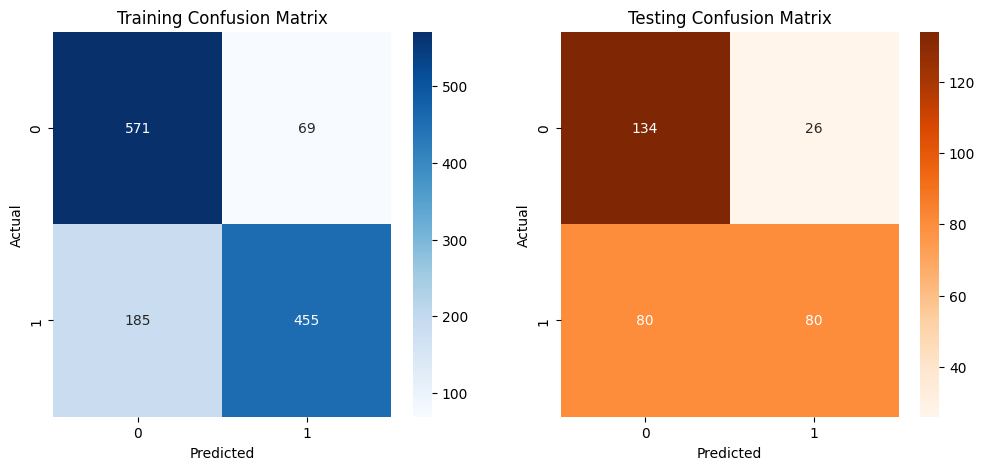

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Training Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Oranges", ax=ax[1])
ax[1].set_title("Testing Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()

*Calculate Precision, Recall, and F1-Score*

In [6]:
from sklearn.metrics import classification_report

# Print classification reports for Training and Testing data
print("Training Performance:\n", classification_report(y_train, y_train_pred))
print("Testing Performance:\n", classification_report(y_test, y_test_pred))

Training Performance:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       640
           1       0.87      0.71      0.78       640

    accuracy                           0.80      1280
   macro avg       0.81      0.80      0.80      1280
weighted avg       0.81      0.80      0.80      1280

Testing Performance:
               precision    recall  f1-score   support

           0       0.63      0.84      0.72       160
           1       0.75      0.50      0.60       160

    accuracy                           0.67       320
   macro avg       0.69      0.67      0.66       320
weighted avg       0.69      0.67      0.66       320



*Analyze Model Learning Outcome*

In [7]:
train_accuracy = np.trace(train_cm) / np.sum(train_cm)
test_accuracy = np.trace(test_cm) / np.sum(test_cm)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

if train_accuracy > 0.95 and test_accuracy < 0.80:
    print("Possible Overfitting")
elif train_accuracy < 0.70 and test_accuracy < 0.70:
    print("Possible Underfitting")
else:
    print("Model is Regular Fit")

Training Accuracy: 0.8016
Testing Accuracy: 0.6687
Model is Regular Fit: Balanced performance on training and test data.


A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02.
Analyse the results.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def preprocess_data(file_path):
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name="Purchase data")

    df = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()

    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
    y = df['Payment (Rs)']

    # Splitting data into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_and_evaluate(X_train, X_test, y_train, y_test, k=3):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predicting payment values
    y_pred = knn.predict(X_test)

    # Calculating evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mape, r2

file_path = "/content/Lab_Session_Data.xlsx"  # Ensure correct file path
X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(file_path)
mse, rmse, mape, r2 = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error (MSE): 3017.8889
Root Mean Squared Error (RMSE): 54.9353
Mean Absolute Percentage Error (MAPE): 16.81%
R2 Score: 0.3928


A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class
color. Observe the plot.


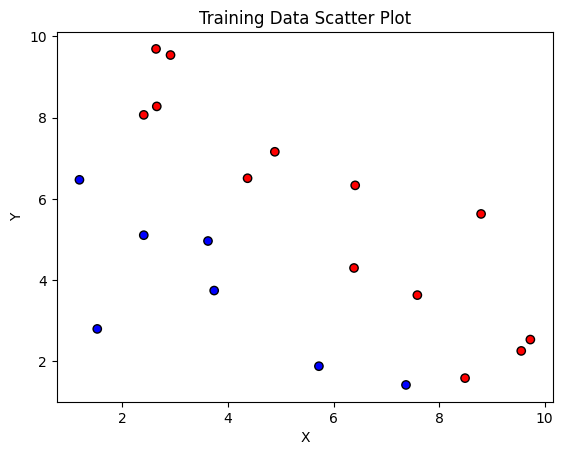

In [ ]:
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)

# Assign class based on X + Y > 10
labels_train = (X_train + Y_train > 10).astype(int)

plt.scatter(X_train, Y_train, c=['blue' if lbl == 0 else 'red' for lbl in labels_train], edgecolors='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data Scatter Plot")
plt.show()

A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1.
This creates a test set of about 10,000 points. Classify these points with above training data using
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread
and class boundary lines in the feature space.


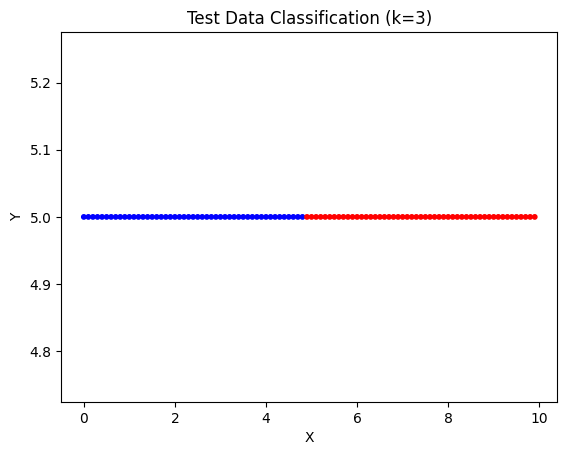

In [ ]:
X_test = np.arange(0, 10, 0.1)
Y_test = np.full_like(X_test, 5)  # Y is constant (to form a line)

# Train kNN (k=3) and classify test data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(np.column_stack((X_train, Y_train)), labels_train)
predictions = knn.predict(np.column_stack((X_test, Y_test)))

plt.scatter(X_test, Y_test, c=['blue' if lbl == 0 else 'red' for lbl in predictions], s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Test Data Classification (k=3)")
plt.show()

A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

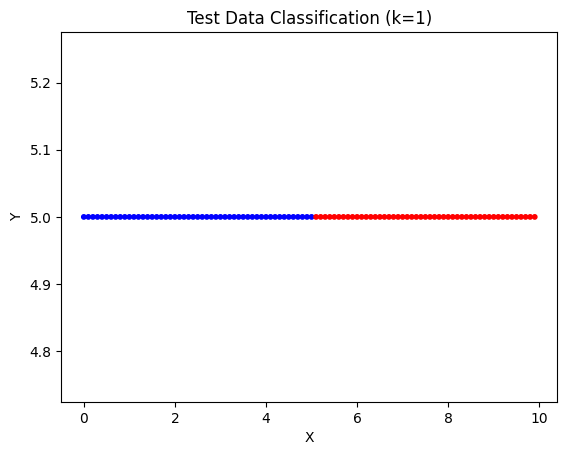

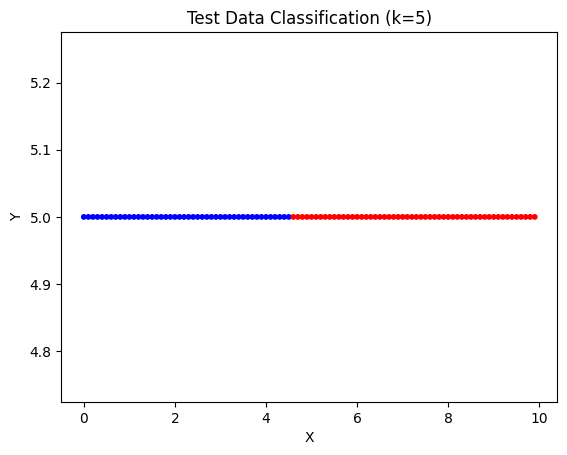

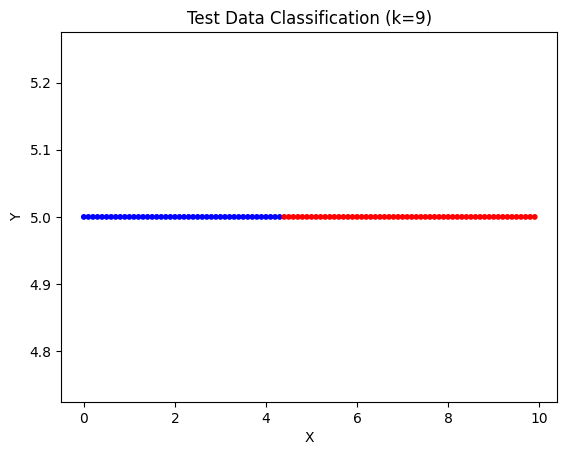

In [ ]:
k_values = [1, 5, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(np.column_stack((X_train, Y_train)), labels_train)
    predictions = knn.predict(np.column_stack((X_test, Y_test)))

    plt.scatter(X_test, Y_test, c=['blue' if lbl == 0 else 'red' for lbl in predictions], s=10)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Test Data Classification (k={k})")
    plt.show()

A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes

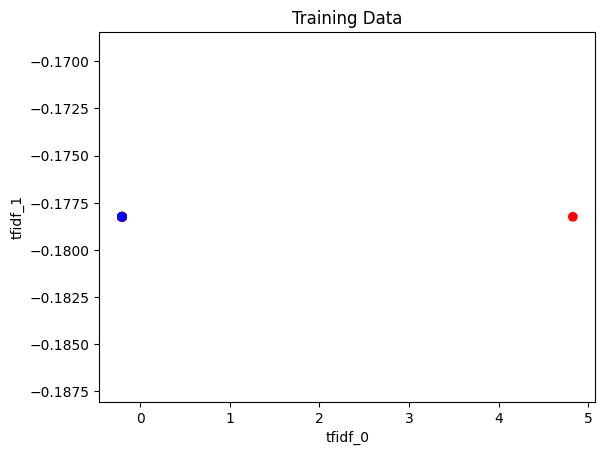

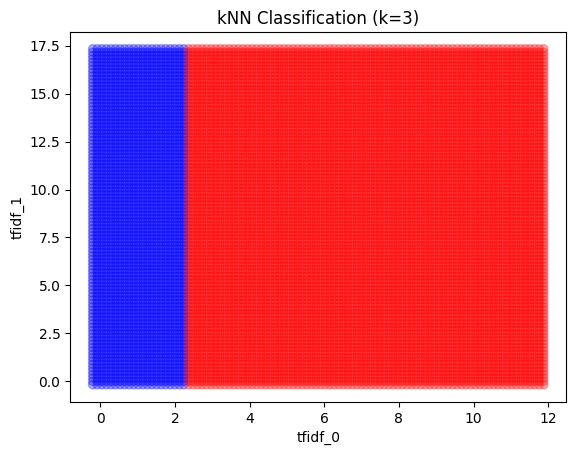

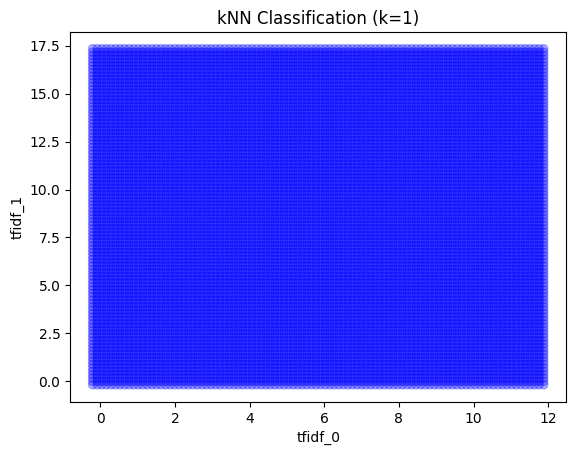

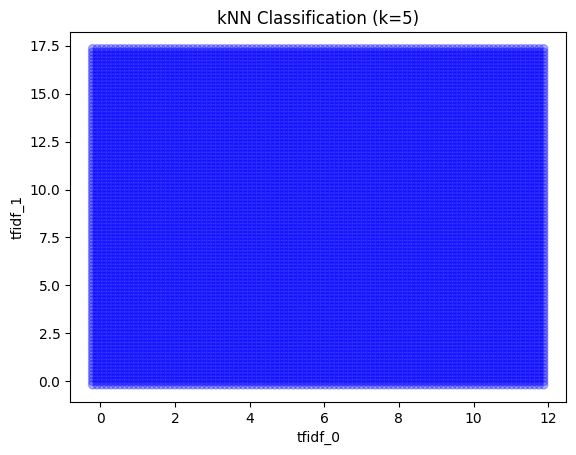

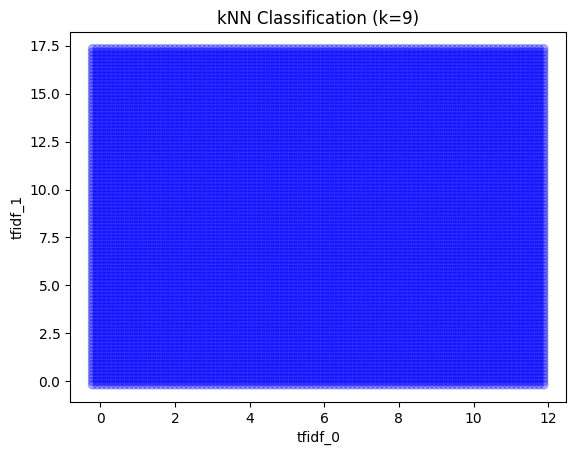

In [ ]:
df = pd.read_csv("/content/dataset.csv")

# Select two features and labels
X = df[['tfidf_0', 'tfidf_1']].values
y = df['label'].values

# Split data (20 points for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=20, random_state=42)

# A3: Scatter plot of training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel("tfidf_0")
plt.ylabel("tfidf_1")
plt.title("Training Data")
plt.show()

# Generate test data (A4)
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx, yy = np.meshgrid(x_range, y_range)
X_test_grid = np.c_[xx.ravel(), yy.ravel()]

# kNN classification and plot (A4)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test_grid)

plt.scatter(X_test_grid[:, 0], X_test_grid[:, 1], c=y_pred, cmap='bwr', alpha=0.3)
plt.xlabel("tfidf_0")
plt.ylabel("tfidf_1")
plt.title("kNN Classification (k=3)")
plt.show()

# A5: Repeat for multiple k values
for k in [1, 5, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test_grid)

    plt.scatter(X_test_grid[:, 0], X_test_grid[:, 1], c=y_pred, cmap='bwr', alpha=0.3)
    plt.xlabel("tfidf_0")
    plt.ylabel("tfidf_1")
    plt.title(f"kNN Classification (k={k})")
    plt.show()

A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your
kNN classifier. This is called hyper-parameter tuning

In [ ]:
from sklearn.model_selection import train_test_split

file_path = "/content/dataset.csv"
df = pd.read_csv(file_path)

# Define features and target
X = df.drop(columns=['label'])
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Finding the best k value
best_k = 1
best_score = 0

for k in range(1, 21):  # Checking k values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_train, y_train)  # Training accuracy

    if score > best_score:
        best_score = score
        best_k = k

print("Best k:", best_k)

Best k: 1
